In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(["area_type","society","balcony","availability"],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Data Cleaning 

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna() #drop nan rows
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [10]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
#adding new "bhk" COLUMN to make analysis easier than "size" column
df3["bhk"] = df3["size"].apply(lambda x:int(x.split(" ")[0]) )
df3.head()

C:\Users\npc\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


43 bedrooms in 2400 sqft is also an error.. we will fix it after

In [14]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

here we can see data in range 1133-1384

In [15]:
# function to detect whether the number is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3["total_sqft"].apply(is_float)].head(10) # "~" is negate operation to return range value

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
#python fucntion which takes range as a input and return mean of the values
def convert_sqft_to_num(x):
    values = x.split("-")
    if len(values) == 2:
        return(float(values[0])+float(values[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num("1234")

1234.0

In [19]:
convert_sqft_to_num("500-1000")

750.0

In [20]:
convert_sqft_to_num("4125Perch	") #returning none

In [21]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df4.loc[30] # 30 is index number

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

FEATURE SCALING 

In [23]:
#creating new feature price per sqft for better performance
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000 / df5["total_sqft"]
df5.head()



,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5["location"].unique()) #1304 locations in total

1304

In [25]:
df5.groupby("location")["location"].agg("count")

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1304, dtype: int64

we cant apply one hot encoding cuz there are too many location i.e. 1309

In [26]:
df5["location"] = df5["location"].apply(lambda x:x.strip()) #it removes spcaces of the location vakues
location_count = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_count

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

so we ll take location count which are less than 10 as a other location... So we can predict future price effectively

In [27]:
# i want to know how many locations have less than 10 data points
len(location_count[location_count <= 10])

1052

In [28]:
location_count_less_than_10 = location_count[location_count <= 10]
location_count_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

total 1052 are less than 10 . So we ll take them as others location

In [29]:
df5["location"] = df5["location"].apply(lambda x : "other" if x in location_count_less_than_10 else x)
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
len(df5["location"].unique()) #now we have 242 unique location

242

# Removing Outliers

In [31]:
#each bedroom shouldnt be less than 300 sqft 
#so we ll check is there any such bedroom or not\

df5[df5["total_sqft"]/df5["bhk"] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:

df5[df5["total_sqft"]/df5["bhk"] < 300].shape

(744, 7)

In [33]:
df5.shape

(13246, 7)

In [34]:
#removing that outliers from the df5 dataframe

df6 = df5[~(df5["total_sqft"]/df5["bhk"] < 300)]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
#so we ve removed that outliers
df6.shape

(12502, 7)

In [36]:
#we can also check outliers taking other feature
#here we would check  with price per sqft

df6["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

we can see min= 267 which is very low and max = 176470 very high

So we would make a function to remove such extreme cases using standara deviation

In [37]:
#function to remove price_per_sqft per location cuz some locations have high price and some locations have low price
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df6.groupby("location"):
        m = np.mean(subdf["price_per_sqft"]) #mean of each locations price per sqft
        st= np.std(subdf["price_per_sqft"]) #standarad deviation of each locations price per sqft
        reduced_df = subdf[(subdf["price_per_sqft"] > (m-st)) & (subdf["price_per_sqft"] <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    

In [38]:
df7 = remove_outliers(df6)
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [39]:
df7.shape

(10241, 7)

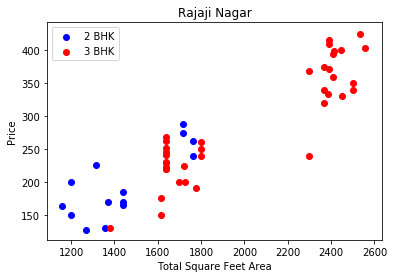

In [40]:
#this function we re creating to plot scatter and to know more about our datapoints 
def plot_scatter(df,location):
    bhk2 = df[(df["location"]==location) & (df["bhk"]==2)]
    bhk3 = df[(df["location"]==location) & (df["bhk"]==3)]
    plt.scatter(bhk2["total_sqft"],bhk2["price"],color="blue",label="2 BHK")
    plt.scatter(bhk3["total_sqft"],bhk3["price"],color="red",label="3 BHK")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter(df7,"Rajaji Nagar")    

here we can easily see the 1700 sqft area with 2 bhk have more prices than 3 bhk (This is outliers)

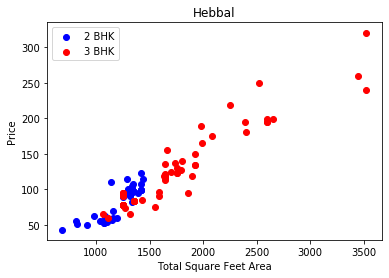

In [41]:
#this function we re creating to plot scatter and to know more about our datapoints 
def plot_scatter(df,location):
    bhk2 = df[(df["location"]==location) & (df["bhk"]==2)]
    bhk3 = df[(df["location"]==location) & (df["bhk"]==3)]
    plt.scatter(bhk2["total_sqft"],bhk2["price"],color="blue",label="2 BHK")
    plt.scatter(bhk3["total_sqft"],bhk3["price"],color="red",label="3 BHK")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter(df7,"Hebbal")    

To remove these outliers, we have to remove 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK Apartment

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean":np.mean(bhk_df["price_per_sqft"]),
                "std":np.std(bhk_df["price_per_sqft"]),
                "count":bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df["price_per_sqft"]<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")
    
df8 = remove_bhk_outliers(df7)   
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


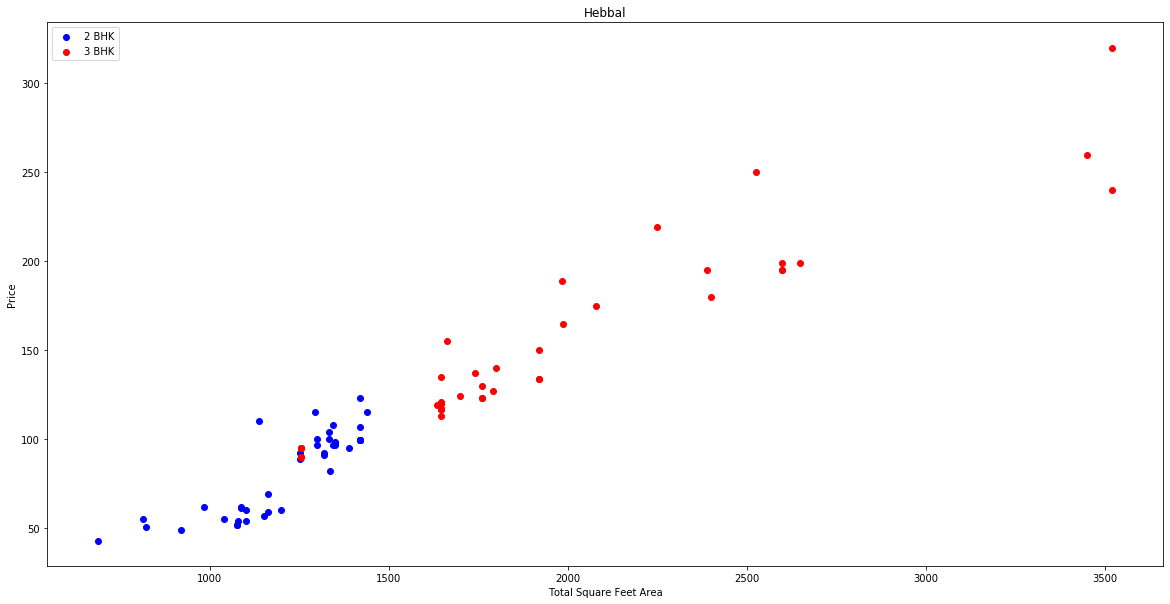

In [43]:
#now check
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plot_scatter(df8,"Hebbal")    


Below Histogram to know how many prpoerties/apartment we have per square fit area

Text(0, 0.5, 'Count')

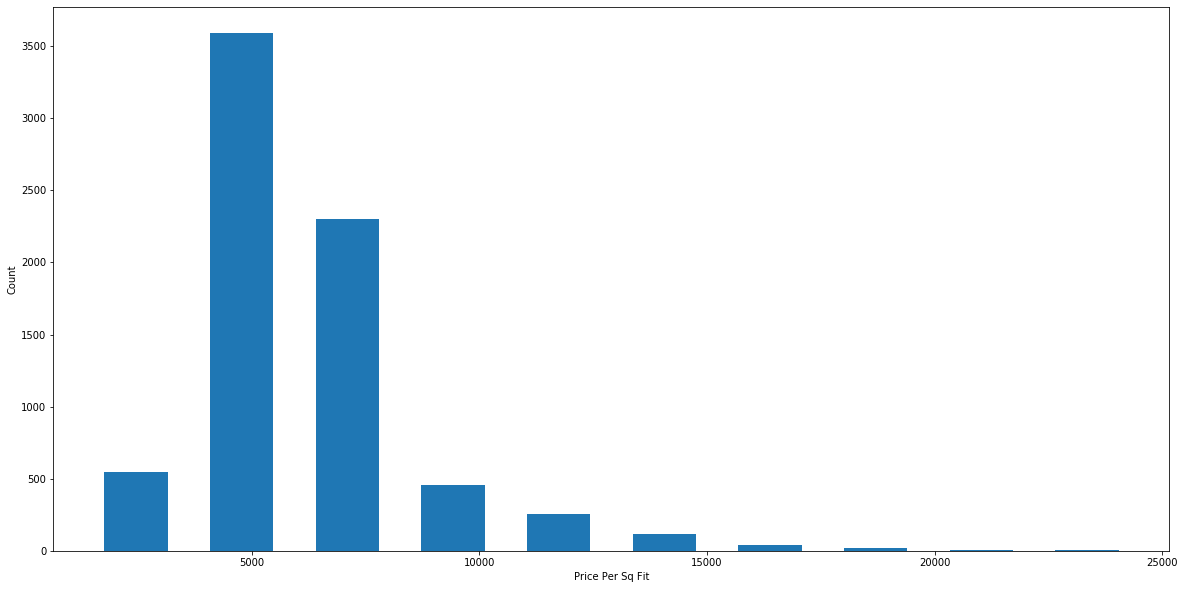

In [44]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8["price_per_sqft"],rwidth=0.6)
plt.xlabel("Price Per Sq Fit")
plt.ylabel("Count")

In [45]:
#now we check bathrooms in an aprtments
df8["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

we can see more than 10 bahtrooms in an apartment

In [46]:
df8[df8["bath"]>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

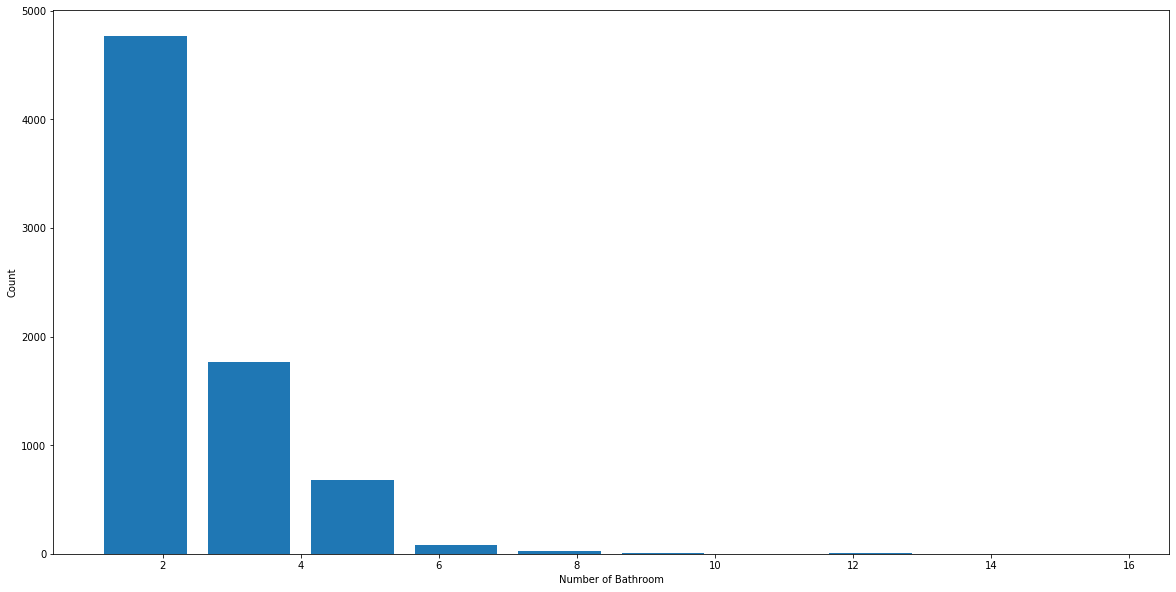

In [47]:
plt.hist(df8["bath"],rwidth=0.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")

anytime if have bathroom more than bedroom + 2 then mark it as a outlier

In [48]:
df8[df8["bath"] > df8["bhk"] + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [49]:
#we have to remove these bathrooms outliers
df9 = df8[(df8["bath"] < df8["bhk"] + 2)]
df9.shape

(7251, 7)

price per sqft and size is unnecessary , so we ve to drop these two columns

In [50]:
df10 = df9.drop(["size","price_per_sqft"],axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [51]:
df10.shape

(7251, 5)

Here we also have categorical values i.e. in location colummn
so we've to change it into numerical cuz machine learning model doesnt understand categorical values

so here we use One Hot Encoding

In [52]:
dummies = pd.get_dummies(df10["location"])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
#we've to concatenate two dataframes ... first is df10, second dummies
#and also dropping last column as one hot encoding needs to drop one column

df11 = pd.concat([df10,dummies.drop("other",axis=1)],axis=1)
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#we dont need categorical values cloumn
df12 = df11.drop("location",axis=1)
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df12.shape

(7251, 245)

In [56]:
X = df12.drop("price",axis=1)
y = df12["price"]
print(X.shape)
print(y.shape)

(7251, 244)
(7251,)


In [57]:
#Here we divide our datasets into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5800, 244)
(5800,)
(1451, 244)
(1451,)


Now to train regression model

In [97]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [98]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
lr_model.score(X_test,y_test) #84.53% accuracy

0.845227769787428

In [100]:
y_pred = lr_model.predict(X_test)
y_pred

array([70.47896311, 33.09312356, 36.00433051, ..., 29.45805298,
       58.43306285, 68.60105208])

In [101]:
y_test

1189     68.00
6016     42.00
4008     46.00
5036    116.00
4815    109.00
         ...  
3274     85.00
3808     55.00
1342     31.48
853      65.12
6247     65.00
Name: price, Length: 1451, dtype: float64

R Square Test 

In [102]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred) #84.52 %

0.845227769787428


# Now we are going to try Ridge and Lasso Regression algo

In [103]:
from sklearn.linear_model import Ridge, Lasso #importing

In [104]:
#Ridge
rd = Ridge(alpha=1)   #alpha here means lamda in formula
rd.fit(X_train,y_train)

rd.score(X_test, y_test) 

0.8439897449096889

In [105]:
#Lasso
ls = Lasso(alpha=1)
ls.fit(X_train,y_train)
ls.score(X_test, y_test)  #not satisfied

0.7237775279429011

K Fold

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)

acc = cross_val_score(LinearRegression(),X,y, cv=cv)
acc


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [128]:
avg =np.mean(acc)
avg 

0.8183540750696234